In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
%matplotlib inline

import pickle

In [2]:
campaign_dict = {"FIREX":"#b71528", "WECAN":"#dc8904", "DC3":"#6a9c30", "ARCTAS":"#1f487e","ATom":"#824a5a"}
color_dict = {"urban":"#246eb9","clean":"#4cb944","heavy_mixed":"#17C3B2","light_mixed":"#f5ee9e","fire":"#f06543",'none':'tab:brown',}
regime_names = {"urban":"Anthropogenic","clean":"Clean","heavy_mixed":"Heavy Mixed","light_mixed":"Light Mixed","fire":"Fire",'none':'tab:brown',}
#update color_dict with new regime names
color_dict1 = {"Anthropogenic":"#246eb9","Clean":"#4cb944","Heavy Mixed":"#17C3B2","Light Mixed":"#f5ee9e","Fire":"#f06543",'none':'tab:brown',}

# Load Data

In [3]:
df = pd.read_csv('../../data/processed/complete_data.csv', parse_dates=['timestamp'], index_col='timestamp')

/tmp/ipykernel_929293/4140673560.py:1: DtypeWarning: Columns (195) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/processed/complete_data.csv', parse_dates=['timestamp'], index_col='timestamp')


In [4]:
# df = pd.read_csv('../../data/airborne_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# Plot

### Figure 2

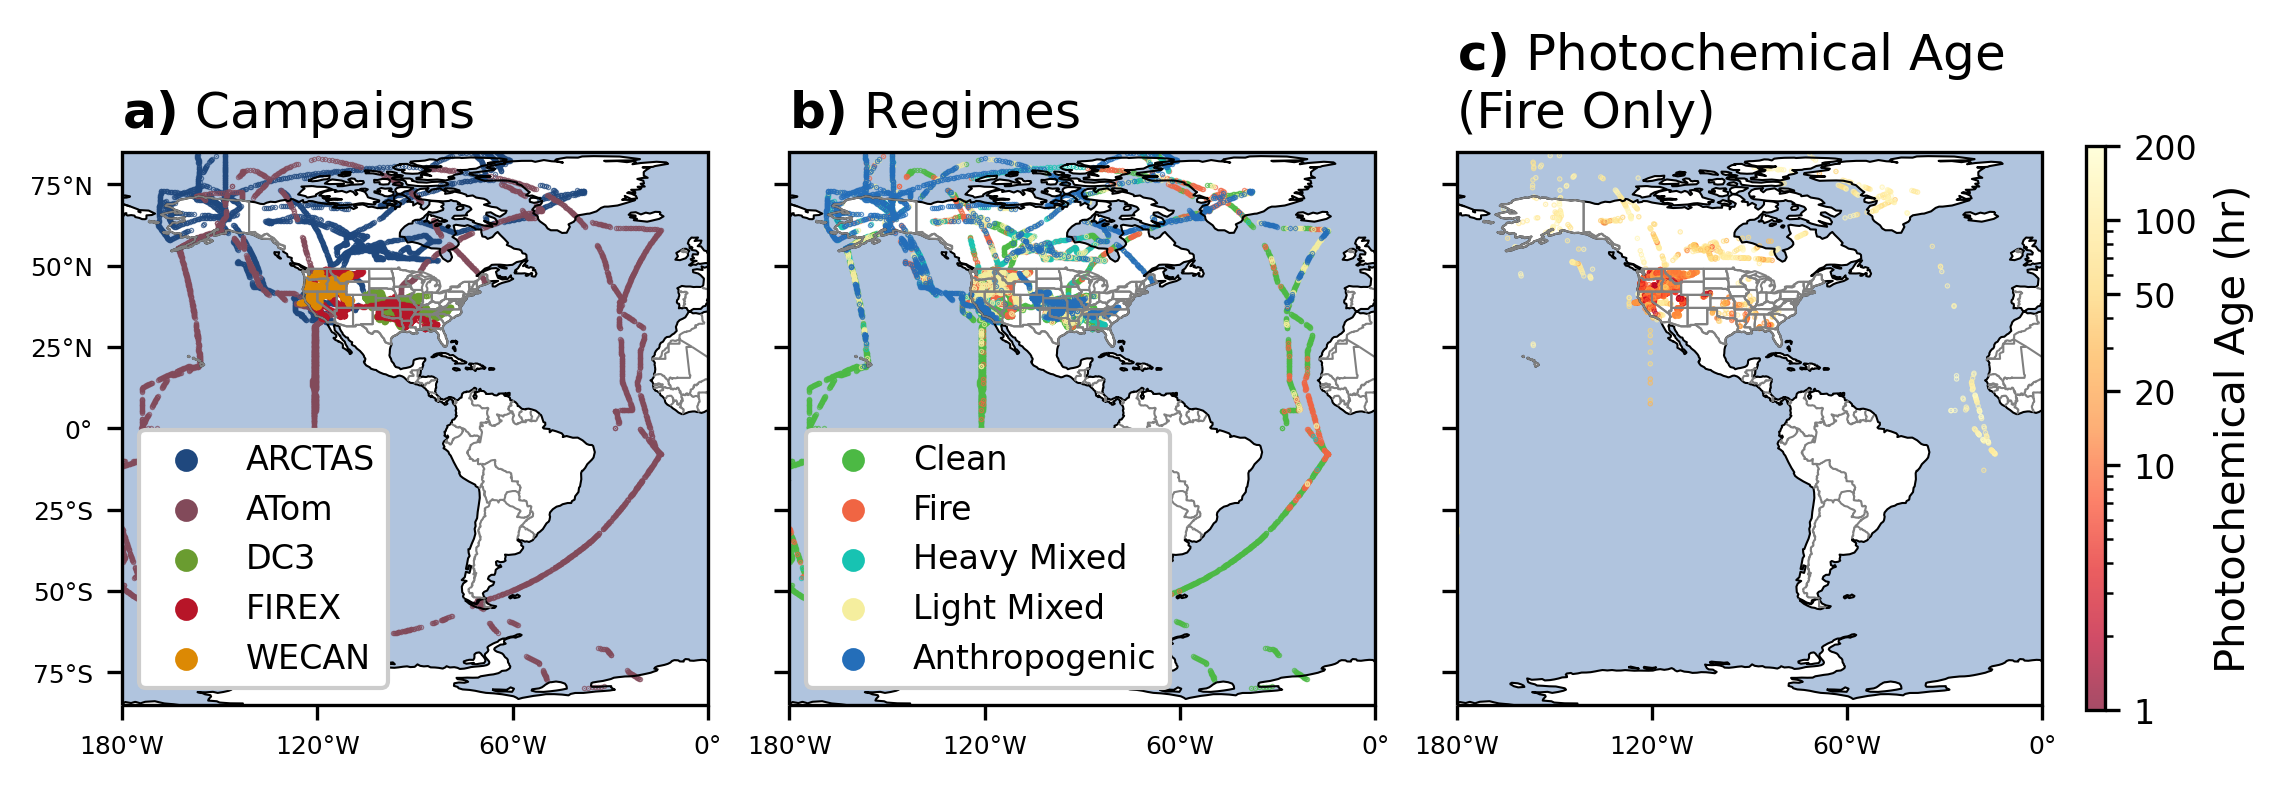

In [6]:
fig, ax = plt.subplots(
        figsize=(7.5, 3.5), dpi=300, 
        sharex=False, sharey=False,
        nrows=1, ncols=3,
        constrained_layout=True,
        subplot_kw={"projection": ccrs.PlateCarree()}
    )

ax = ax.flatten()
titles= [r'$\bf{a)}$ Campaigns', r'$\bf{b)}$ Regimes', r'$\bf{c)}$ Photochemical Age' '\n' '(Fire Only)']

for idx in range(3):
    ax[idx].coastlines(linewidth=0.5)
    country_borders = cfeature.NaturalEarthFeature(
        category="cultural",
        name="admin_0_boundary_lines_land",
        scale="50m",
        facecolor="none",
    )
    ax[idx].add_feature(cartopy.feature.STATES, edgecolor="gray", linewidth=0.5)
    ax[idx].add_feature(country_borders, edgecolor="gray", linewidth=0.5)
    ax[idx].add_feature(cartopy.feature.OCEAN, facecolor='lightsteelblue')
    ax[idx].set_extent([-180, 0, -85, 85], crs=ccrs.PlateCarree())
    ax[idx].set_title(titles[idx], loc='left')
    
    if idx == 0:
        ax[idx].set_xticks([-180, -120, -60, 0,])
        ax[idx].set_xticklabels(
            ['180°W', '120°W', '60°W', '0°',], fontsize=6)
        ax[idx].set_yticks([-75, -50, -25,0,25,50,75])
        ax[idx].set_yticklabels(
            ['75°S', '50°S', '25°S', '0°', '25°N', '50°N', '75°N'], fontsize=6)
    else:
        ax[idx].set_xticks([-180, -120, -60, 0,])
        ax[idx].set_xticklabels(['180°W', '120°W', '60°W', '0°'], fontsize=6)
        ax[idx].set_yticks([-75, -50, -25,0,25,50,75])
        ax[idx].set_yticklabels(
            ['', '', '', '', '', '', ''], fontsize=6)
    
for campaign, g in df.groupby('campaign'):
    latitude = g['lat']
    longitude = g['long']
    # Draw the path of the flight
    ax[0].scatter(longitude, latitude, transform=ccrs.PlateCarree(),
                      linewidth=1,
                      alpha=0.7,
                      s=0.1,
                      color=campaign_dict[campaign],
                      label=campaign)
l = ax[0].legend(frameon = True, framealpha=1, fontsize=8)
for i in range(5):
    l.legendHandles[i]._sizes = [20]
    l.legendHandles[i].set_alpha(1)
    
    
for regime, g in df.groupby('regime'):
    if regime == 'none':
        continue
    latitude = g['lat']
    longitude = g['long']
    # Draw the path of the flight
    ax[1].scatter(longitude, latitude, transform=ccrs.PlateCarree(),
                      linewidth=1,
                      alpha=0.7,
                      s=0.1,
                      color=color_dict[regime],
                      label=regime_names[regime])
l = ax[1].legend(frameon = True, framealpha=1, fontsize=8)
for i in range(5):
    l.legendHandles[i]._sizes = [20]
    l.legendHandles[i].set_alpha(1)
    
p = ax[2].scatter(df['long'], df['lat'], transform=ccrs.PlateCarree(),
                  linewidth=1,
                  alpha=0.7,
                  s=0.1,
                  c=df['age'],
                  norm=matplotlib.colors.LogNorm(vmin=1, vmax=200),
                  cmap='YlOrRd_r')
    
ticks = [1, 10, 20, 50, 100, 200]
cax,kw = mpl.colorbar.make_axes(ax[2], location='right', pad=0.05, shrink=0.55, aspect=30)
cbar = fig.colorbar(p, ticks=ticks, cax=cax, **kw)
cbar.set_label('Photochemical Age (hr)', fontsize=10)
cbar.set_ticklabels(ticks, fontsize=8)
    

#save figure as pdf
plt.savefig("../../figures/fig_02.pdf", bbox_inches='tight', dpi=300)
plt.show()

### Figure S4

In [7]:
# rename regime columns according to regime_names
df['regime'] = df['regime'].replace({'urban':'Anthropogenic','clean':'Clean','heavy_mixed':'Heavy Mixed','light_mixed':'Light Mixed','fire':'Fire'})

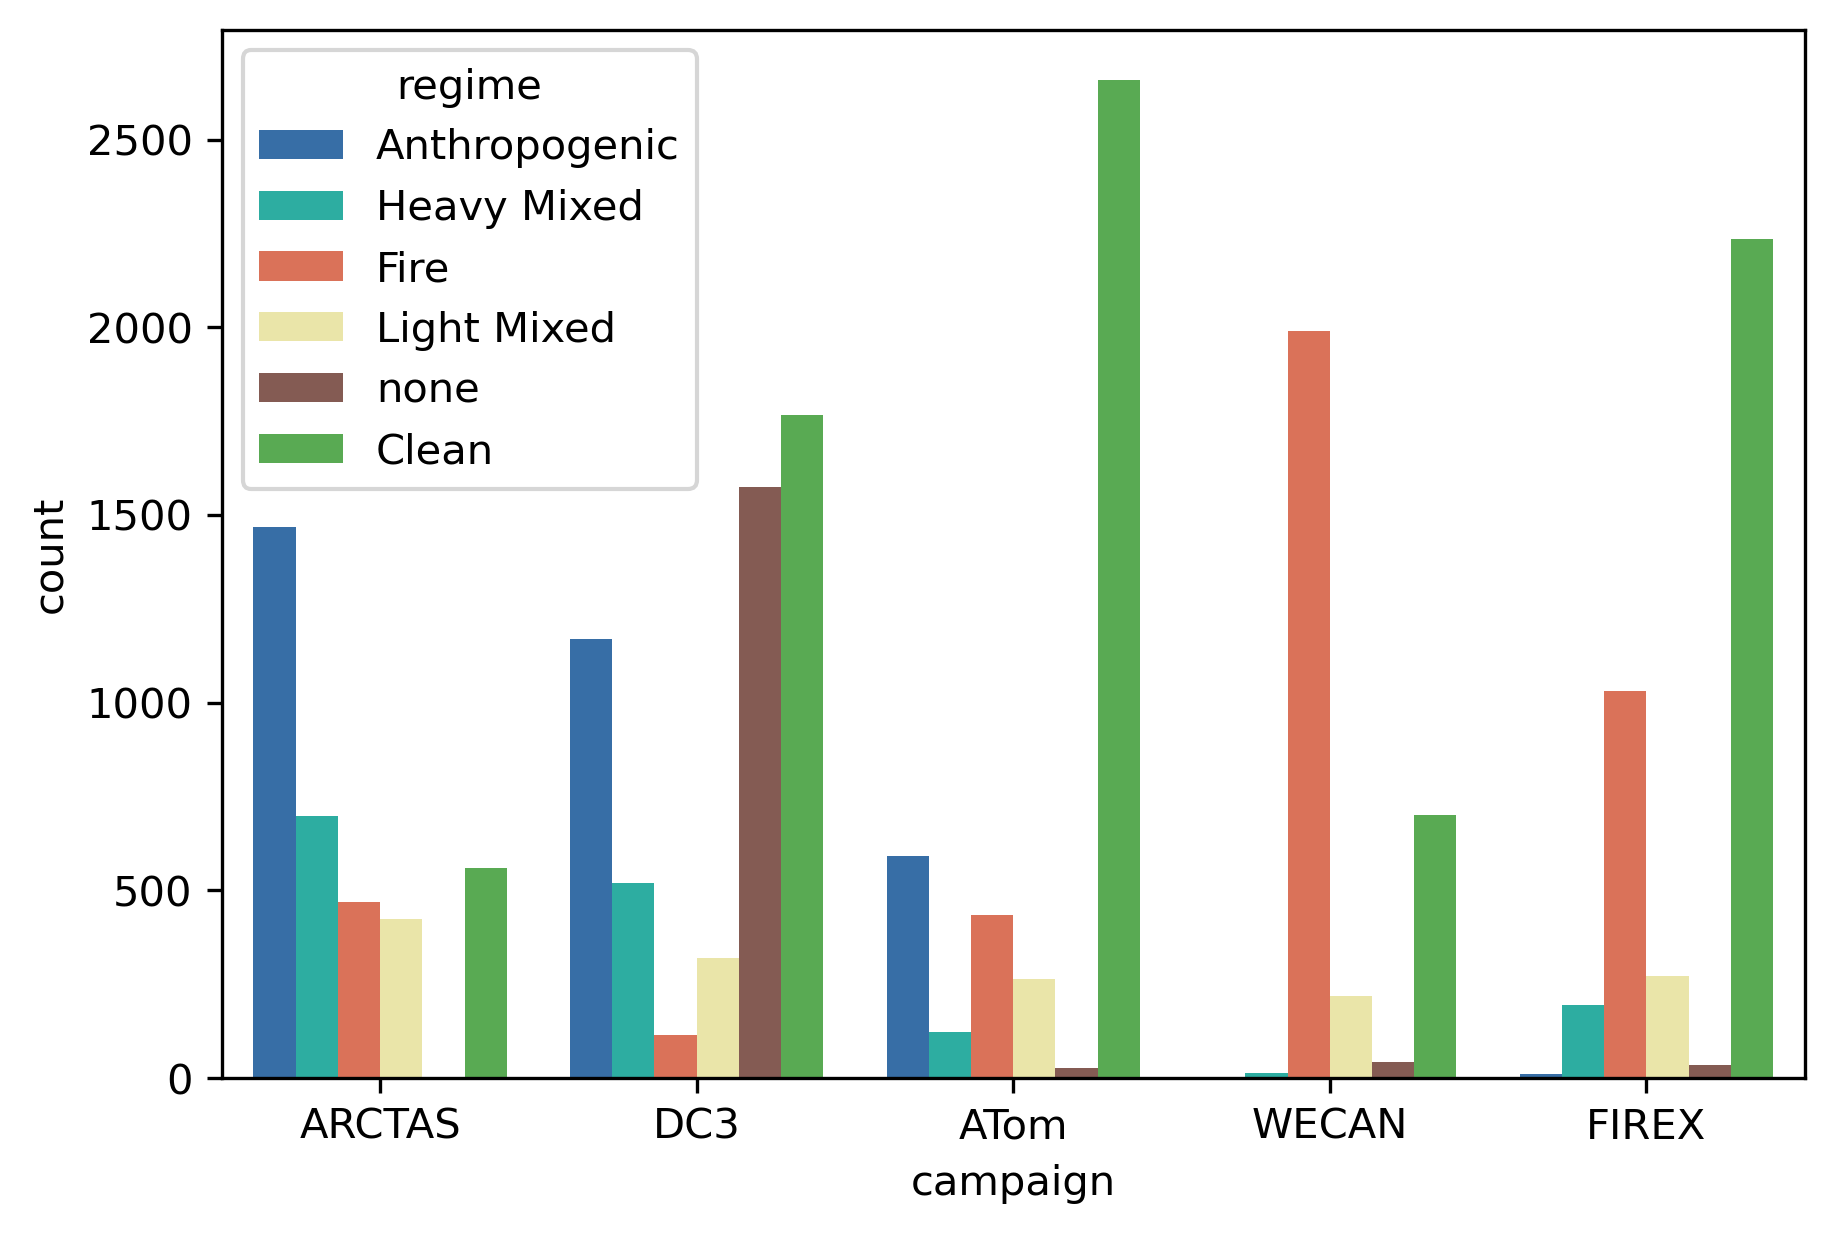

In [8]:
fig,ax = plt.subplots(dpi=300, figsize=(6, 4), constrained_layout=True)
sns.countplot(data=df, x='campaign', hue='regime', palette=color_dict1,);
#save figure as pdf
plt.savefig("../../figures/supfig_04.pdf", bbox_inches='tight', dpi=300)